### Nacachian Mauro -- 99619
## Ejercicio 4-C 

Graficos del histograma de Y_n y su funcion de densidad. 

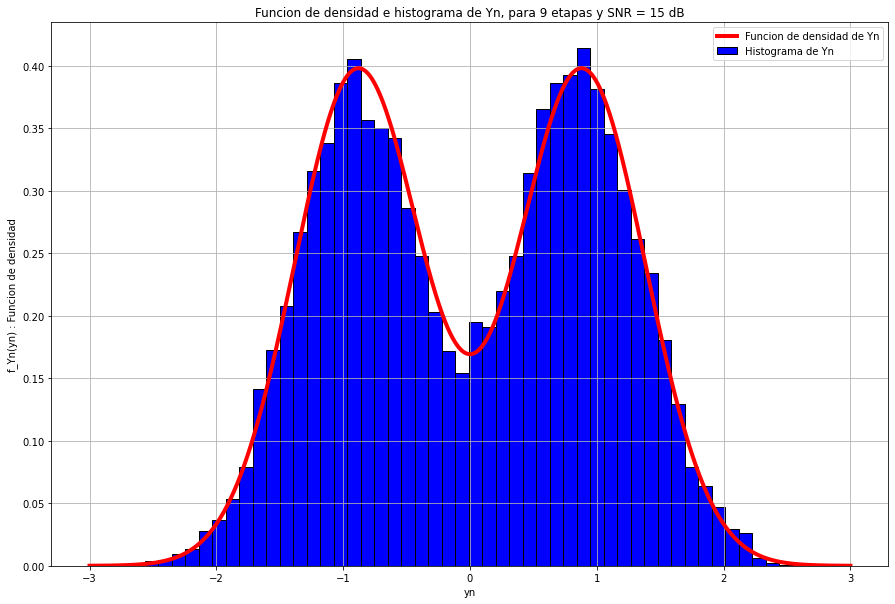

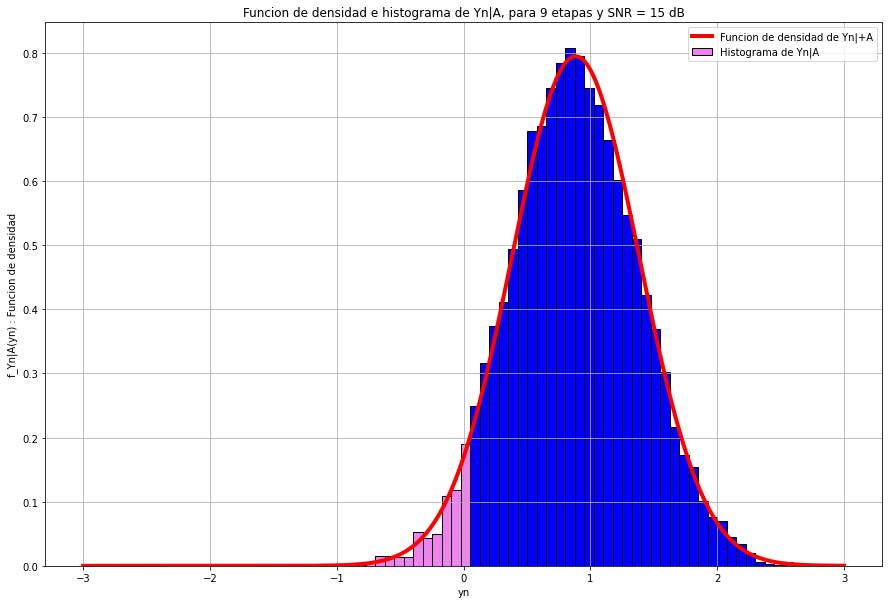

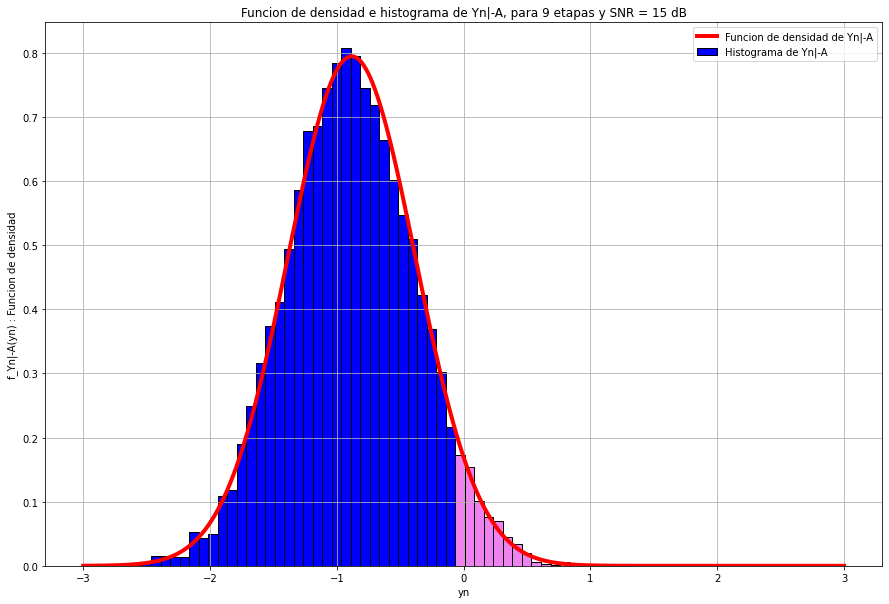

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

k = 10000
n = 9 ## cantidad de etapas
h = 1
A = 1

snr_db = 15# en dB
snr = 10**((snr_db)/10)
sigma = pow(h, 2) * pow(A, 2) / snr
G = np.sqrt(snr / (snr + 1)) / h


################################################
#----------------------------------------------#
#---------------- Histograma ------------------#
#----------------------------------------------#
################################################

x1 = np.random.choice([A, -A], k, p = [0.5, 0.5])
w = np.random.randn(k, n) * np.sqrt(sigma)

noise = []
# Para cada muestra
for i in range(k):
    sum = 0
    # Para cada etapa
    for j in range(n):
        sum = sum + w[i][j] * pow(G*h, n - (j + 1))
    noise = np.append(noise, sum)
    
yn = x1 * pow(h, n) * pow(G, n - 1) + noise

ynPlusA = A * pow(h, n) * pow(G, n - 1) + noise
ynMinusA = -A * pow(h, n) * pow(G, n - 1) + noise


plt.figure(figsize = (15,10))
hist1, bins1, patches1 = plt.hist(yn, bins = 50, density = True, color = 'blue', label = 'Histograma de Yn',edgecolor ='black')
#area = np.trapz(pdfy, dx = bins[1]-bins[0])

################################################
#----------------------------------------------#
#------- Funcion de densidad de Yn ------------#
#----------------------------------------------#
################################################


mu1 = +A * pow(h ,n) * pow(G, n - 1)
mu2 = -A * pow(h ,n) * pow(G, n - 1)
var = sigma * ( (  pow(G, 2 * n) * pow(h, 2 * n) - 1 ) / ( pow(G, 2) * pow(h, 2) - 1 ) )

y = np.linspace(-3,3,k)
#y1  = np.linspace(mu1 - 3 * np.sqrt(var), mu1 + 3 * np.sqrt(var), k)
#y2  = np.linspace(mu2 - 3 * np.sqrt(var), mu2 + 3 * np.sqrt(var), k)

pdfy1 = stats.norm.pdf(y, mu1, np.sqrt(var))
pdfy2 = stats.norm.pdf(y, mu2, np.sqrt(var))

pdf = pdfy1 * (1/2) + pdfy2 / 2
#area1 = np.trapz(pdf, dx = y[1] - y[0])
plt.plot(y, pdf, color = 'red', linewidth = 4, label = 'Funcion de densidad de Yn') # * (y1[1] - y1[0]))

plt.ylabel('f_Yn(yn) : Funcion de densidad')
plt.xlabel('yn')
plt.title('Funcion de densidad e histograma de Yn, para {0} etapas y SNR = {1} dB'.format(n,snr_db))
plt.legend()
plt.grid(True)
plt.savefig("histogram15")

##################################
#### Histograma + pdf de Yn|A ####
##################################

plt.figure(figsize = (15,10))
hist2, bins2, patches2 = plt.hist(ynPlusA, bins = 50, density = True, color = 'blue', label = 'Histograma de Yn|A', edgecolor ='black')

plt.plot(y, pdfy1, color = 'red', linewidth = 4, label = 'Funcion de densidad de Yn|+A')

for i in np.where(np.logical_and(bins2 <= 0, bins2 >-3))[0]:
    patches2[i].set_fc('violet')


plt.ylabel('f_Yn|A(yn) : Funcion de densidad')
plt.xlabel('yn')
plt.title('Funcion de densidad e histograma de Yn|A, para {0} etapas y SNR = {1} dB'.format(n,snr_db))
plt.legend()
plt.grid(True)
plt.savefig("histogramA")

###################################
#### Histograma + pdf de Yn|-A ####
###################################

plt.figure(figsize = (15,10))
hist3, bins, patches = plt.hist(ynMinusA, bins = 50, density = True, color = 'blue', edgecolor ='black', label = 'Histograma de Yn|-A')

plt.plot(y, pdfy2, color = 'red', linewidth = 4, label = 'Funcion de densidad de Yn|-A') 

for i in np.where((bins >= -0.1))[0]:
    patches[i].set_fc('violet')
    if i == 49:
        break


plt.ylabel('f_Yn|-A(yn) : Funcion de densidad')
plt.xlabel('yn')
plt.title('Funcion de densidad e histograma de Yn|-A, para {0} etapas y SNR = {1} dB'.format(n,snr_db))
plt.legend()
plt.grid(True)
plt.savefig("histogram-A")
